# Setup

In [1]:
# check GPU
!nvidia-smi

Sun Dec 18 14:44:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# pull repo
!git clone https://github.com/char-tan/mode_connectivity.git

Cloning into 'mode_connectivity'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 200 (delta 104), reused 169 (delta 73), pack-reused 0
Receiving objects: 100% (200/200), 133.39 KiB | 11.12 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [3]:
# change working directory
import os
os.chdir('mode_connectivity')

In [4]:
# checkout branch
!git checkout refactor_poc

Branch 'refactor_poc' set up to track remote branch 'refactor_poc' from 'origin'.
Switched to a new branch 'refactor_poc'


# Train models

In [5]:
import torch

from training_config import MLP_MNIST_DEFAULT
from training import setup_train, train_model

training_config = MLP_MNIST_DEFAULT
training_config.epochs = 10
training_config.seed = 7

# train model a
model_a = train_model(*setup_train(training_config), verbose = 1)
torch.save(model_a.state_dict(), 'model_a.pt')

# change seed to get different model
training_config.seed = 42

# train model b
model_b = train_model(*setup_train(training_config), verbose = 1)
torch.save(model_b.state_dict(), 'model_b.pt')                                        

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/content/mode_connectivity/models/mlp.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


Train Epoch: 1, Train Accuracy: (90%) 
Average loss: 0.1298, Accuracy: (96%)
Train Epoch: 2, Train Accuracy: (97%) 
Average loss: 0.0944, Accuracy: (97%)
Train Epoch: 3, Train Accuracy: (98%) 
Average loss: 0.0724, Accuracy: (98%)
Train Epoch: 4, Train Accuracy: (99%) 
Average loss: 0.0766, Accuracy: (98%)
Train Epoch: 5, Train Accuracy: (99%) 
Average loss: 0.0804, Accuracy: (98%)
Train Epoch: 6, Train Accuracy: (99%) 
Average loss: 0.0740, Accuracy: (98%)
Train Epoch: 7, Train Accuracy: (99%) 
Average loss: 0.0777, Accuracy: (98%)
Train Epoch: 8, Train Accuracy: (99%) 
Average loss: 0.0788, Accuracy: (98%)
Train Epoch: 9, Train Accuracy: (99%) 
Average loss: 0.0820, Accuracy: (98%)
Train Epoch: 10, Train Accuracy: (100%) 
Average loss: 0.0766, Accuracy: (98%)
Train Epoch: 1, Train Accuracy: (90%) 
Average loss: 0.1377, Accuracy: (96%)
Train Epoch: 2, Train Accuracy: (97%) 
Average loss: 0.0931, Accuracy: (97%)
Train Epoch: 3, Train Accuracy: (98%) 
Average loss: 0.0795, Accuracy: (98

# Weight matching

performing naive interpolation
lam = 0.0


/content/mode_connectivity/models/mlp.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.log_softmax(x)


Average loss: 0.0067, Accuracy: (100%)
Average loss: 0.0766, Accuracy: (98%)
lam = 0.1111111119389534
Average loss: 0.0185, Accuracy: (100%)
Average loss: 0.0664, Accuracy: (98%)
lam = 0.2222222238779068
Average loss: 0.1042, Accuracy: (99%)
Average loss: 0.1353, Accuracy: (98%)
lam = 0.3333333432674408
Average loss: 0.5118, Accuracy: (98%)
Average loss: 0.5258, Accuracy: (96%)
lam = 0.4444444477558136
Average loss: 1.1631, Accuracy: (93%)
Average loss: 1.1653, Accuracy: (92%)
lam = 0.5555555820465088
Average loss: 1.1807, Accuracy: (92%)
Average loss: 1.1804, Accuracy: (91%)
lam = 0.6666666865348816
Average loss: 0.5427, Accuracy: (97%)
Average loss: 0.5539, Accuracy: (96%)
lam = 0.7777777910232544
Average loss: 0.1219, Accuracy: (99%)
Average loss: 0.1507, Accuracy: (97%)
lam = 0.8888888955116272
Average loss: 0.0279, Accuracy: (99%)
Average loss: 0.0724, Accuracy: (98%)
lam = 1.0
Average loss: 0.0148, Accuracy: (100%)
Average loss: 0.0821, Accuracy: (98%)
permuting model
0/P_1: 56.6

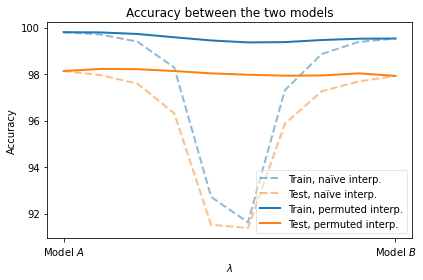

In [6]:
from lmc import linear_mode_connect
from models.mlp import MLP

linear_mode_connect(MLP, 'model_a.pt','model_b.pt', "mnist", n_points = 10)